![steam](Steam.jpg)

# Introduction to the Steam Games Dataset

The Steam Games dataset offers detailed information about various games available on the Steam platform. Here’s a brief overview of the key columns:

- **Name:** The title of the game.
- **Release date:** When the game was released on Steam.
- **Estimated owners:** The number of users who own the game.
- **Peak CCU:** The highest number of concurrent players.
- **Price:** The cost of the game.
- **Metacritic score:** The critics' review score.
- **User score:** The average score given by players.
- **Positive:** The number of positive reviews.
- **Negative:** The number of negative reviews.
- **Average playtime forever:** The average total playtime.
- **Average playtime two weeks:** The average playtime over the past two weeks.
- **Median playtime forever:** The median total playtime.
- **Developers:** Who developed the game.
- **Publishers:** Who published the game.
- **Genres:** The categories of the game (e.g., Action, Adventure).
- **Tags:** User-generated tags describing the game.

This dataset is useful for analyzing trends, understanding player preferences, and evaluating game performance on Steam.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Preparation

In [2]:
df = pd.read_csv("games.csv")
df1 = df[['Name', 'Release date', 'Estimated owners','Peak CCU','Price', 'Metacritic score', 'User score', 'Positive', 'Negative', 
          'Average playtime forever','Average playtime two weeks','Median playtime forever', 'Developers','Publishers', 'Genres', 'Tags']]

df1.head()

,Name,Release date,Estimated owners,Peak CCU,Price,Metacritic score,User score,Positive,Negative,Average playtime forever,Average playtime two weeks,Median playtime forever,Developers,Publishers,Genres,Tags
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,0,0,6,11,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,0,0,53,5,0,0,0,Rusty Moyher,Wild Rooster,"Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,0,0,0,0,0,0,0,Campião Games,Campião Games,"Action,Adventure,Indie,Strategy",NaN
3,Henosis™,"Jul 23, 2020",0 - 20000,0,5.99,0,0,3,0,0,0,0,Odd Critter Games,Odd Critter Games,"Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,0,0,50,8,0,0,0,Unusual Games,Unusual Games,"Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [3]:
df1 = df1.sort_values(by='Name')

In [4]:
df1['User score'].fillna(0, inplace=True)
df1['User score'].fillna(0, inplace=True)
df1['Date'] = df1['Release date'].apply(lambda x: x.split(' ')[-1])
df1['Date'] =df1['Date'].astype('int')

In [5]:
df1['Developers'].fillna('Original Criation', inplace=True)
df1['Publishers'].fillna('Auto Publication*', inplace=True)

### Evaluated Games from 2020 to 2024

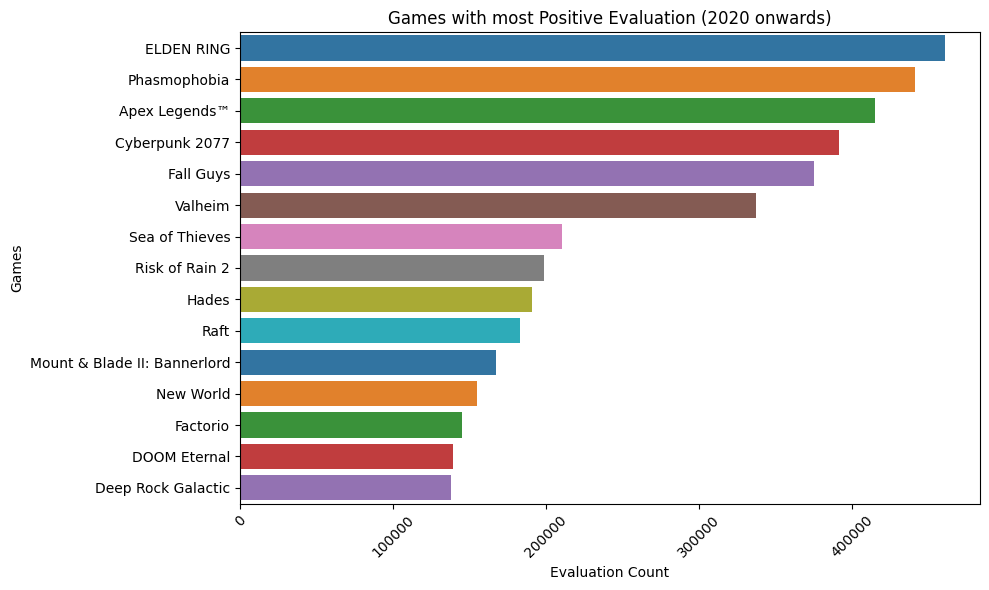

In [6]:
recent_score = df1[df1['Date']>=2020]

scores = recent_score.groupby('Name')[['Positive']].sum()

top_games = scores.nlargest(15,'Positive')

plt.figure(figsize=(10,6))
sns.barplot(x= top_games['Positive'], y=top_games.index, palette='tab10')
plt.title("Games with most Positive Evaluation (2020 onwards)")
plt.xlabel("Evaluation Count")
plt.ylabel("Games")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Developers on steam

In terms of sheer volume, individual developers and small indie groups may collectively publish more<br> 
games on platforms like Steam compared to larger companies. This is because indie developers<br>
often have smaller teams and shorter development cycles, allowing them to release multiple titles over time.

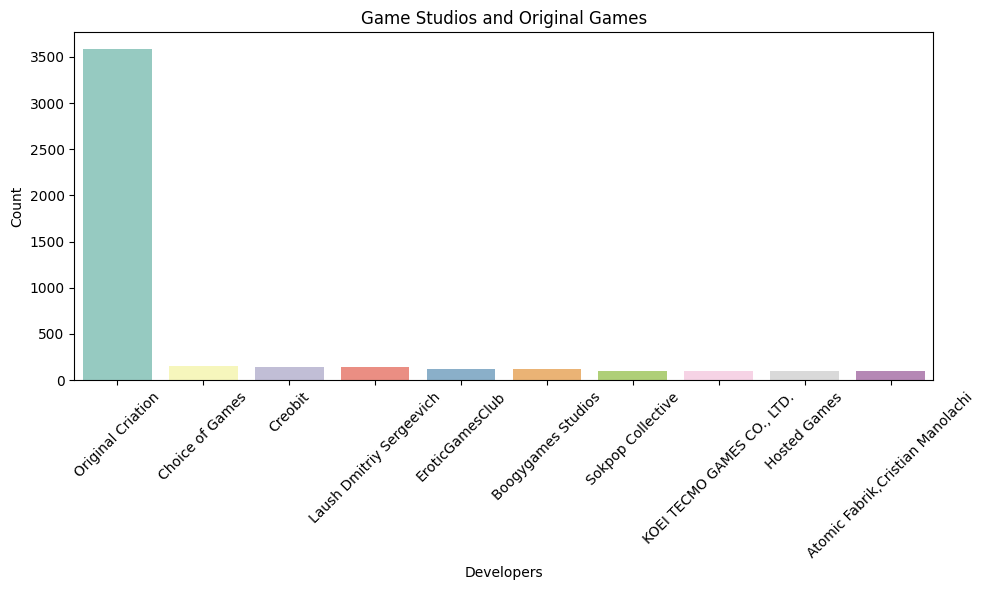

In [7]:
dev = df1['Developers'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= dev.index, y= dev.values, palette='Set3')
plt.title("Game Studios and Original Games")
plt.xlabel("Developers")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Publishers of games

As well as most of the games on steam are made by small or individual developers, they have to publish there our work.

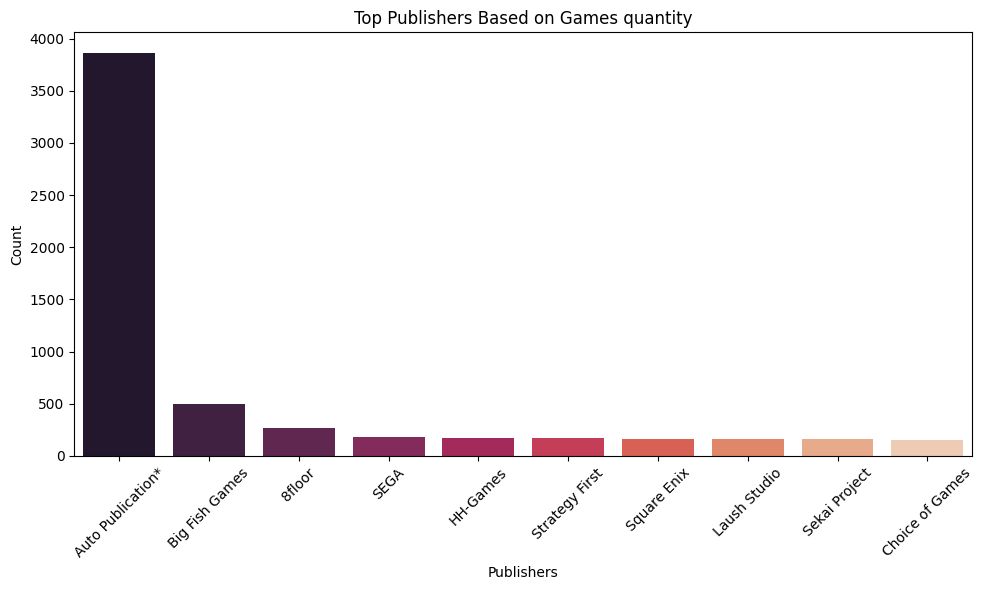

In [8]:
pb = df1['Publishers'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= pb.index, y= pb.values, palette='rocket')
plt.title("Top Publishers Based on Games quantity")
plt.xlabel("Publishers")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Estimated top games

Most played games share common traits like engaging gameplay, accessibility across platforms,<br> strong communities, regular updates, and innovation. Positive reviews, esports scenes, and word of<br> mouth also contribute to their popularity. Additionally, many are online, competitive, and free-to-play.

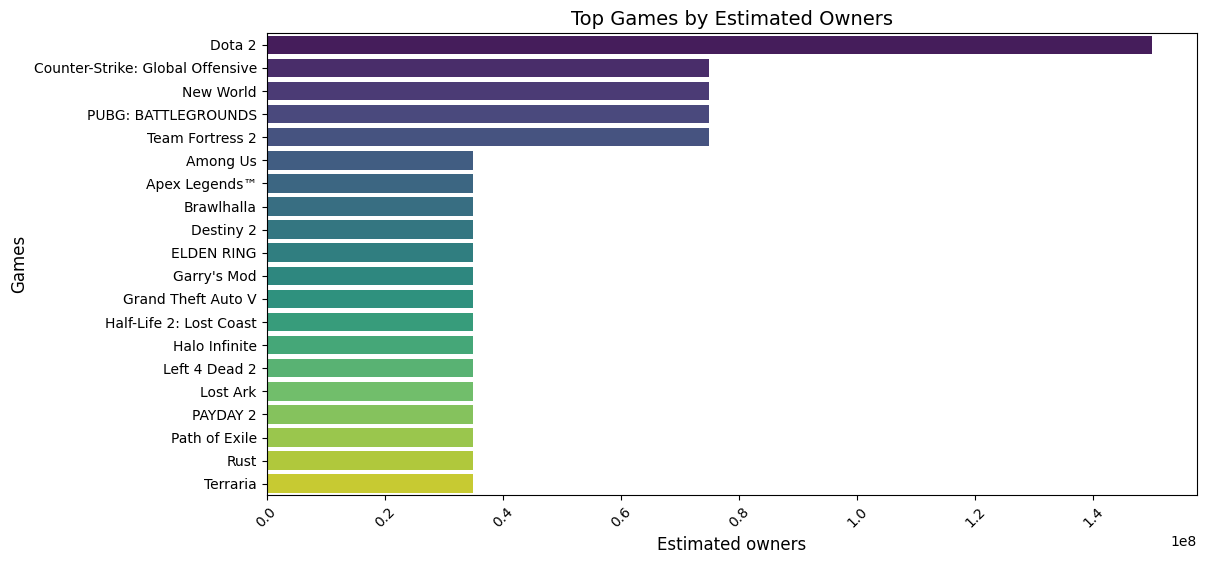

In [9]:
def extract_midpoint(range_str):
    if range_str == 'Unknown':
        return None
    range_parts = range_str.split(' - ')
    return (int(range_parts[0]) + int(range_parts[1])) // 2

df1['Estimated owners'] = df1['Estimated owners'].apply(extract_midpoint)
df1['Estimated owners'] = pd.to_numeric(df1['Estimated owners'], errors='coerce')

df1 = df1.dropna(subset=['Estimated owners'])

top_owners = df1.nlargest(20, 'Estimated owners')
top_owners_info = top_owners[['Name','Estimated owners']]

plt.figure(figsize=(12,6))
sns.barplot(y='Name', x='Estimated owners', data=top_owners_info, palette='viridis')
plt.title('Top Games by Estimated Owners', fontsize=14)
plt.ylabel('Games', fontsize=12)
plt.xlabel('Estimated owners', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Best games based on Metacrict

In [10]:
metacrit = ~(df1['Metacritic score']==0)
meta_filtered = df1[metacrit]
meta_filtered.groupby('Name')[['Metacritic score']].mean().nlargest(10, 'Metacritic score')

,Metacritic score
Name,
Disco Elysium - The Final Cut,97.0
Persona 5 Royal,97.0
BioShock™,96.0
Grand Theft Auto V,96.0
Half-Life,96.0
Half-Life 2,96.0
Portal 2,95.0
BioShock Infinite,94.0
Divinity: Original Sin - Enhanced Edition,94.0


### Tags

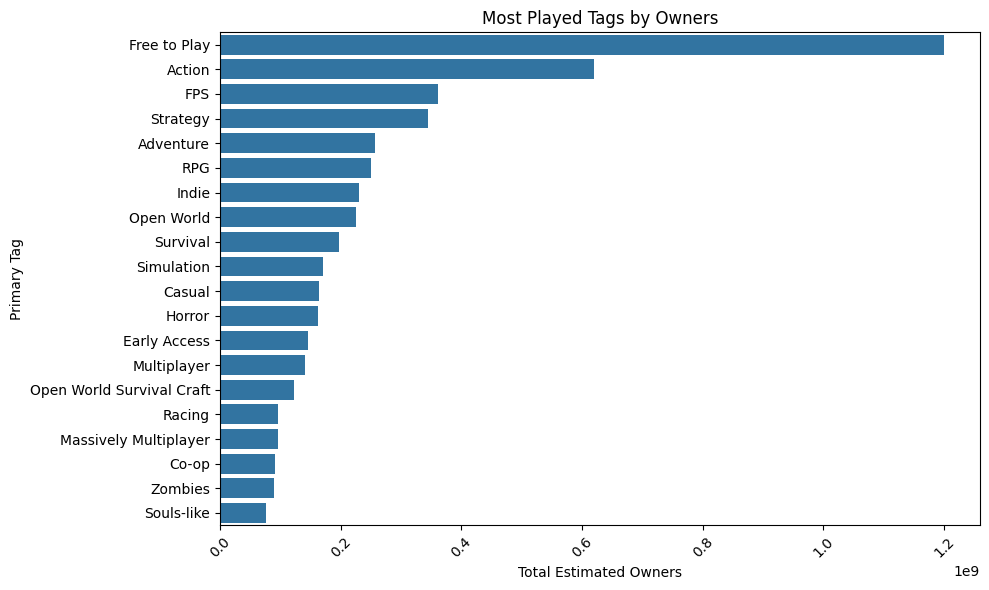

In [14]:
df1 = df1.dropna(subset=['Tags'])

def take_first(tags):
    if pd.isna(tags):
        return None
    tag = str(tags).split(',')
    return tag[0]

tags = df1['Tags'].apply(take_first)
df1['Tags Prime'] = tags

tag = df1.groupby('Tags Prime')[['Estimated owners']].sum().reset_index()
tag = tag.sort_values(by='Estimated owners', ascending=False)
top_tags = tag.head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='Estimated owners', y='Tags Prime', data=top_tags)
plt.title("Most Played Tags by Owners")
plt.xlabel("Total Estimated Owners")
plt.ylabel("Primary Tag")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Genres

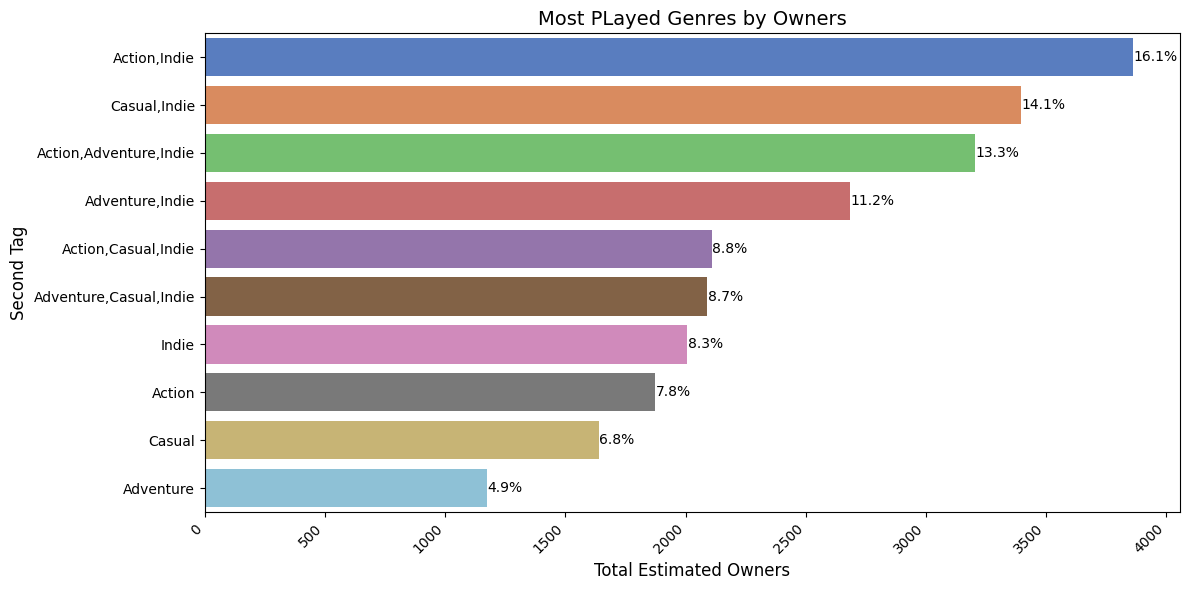

In [12]:
genres = df1['Genres'].value_counts().nlargest(10)

total_games = genres.sum()
percentages = [(count / total_games) * 100 for count in genres]

plt.figure(figsize=(12, 6))
barplot = sns.barplot(y=genres.index, x=genres.values, palette='muted', orient='h')

for i, (count, percentage) in enumerate(zip(genres, percentages)):
    barplot.text(genres.values[i] + 2, i, f'{percentage:.1f}%', ha='left', va='center', fontsize=10)

plt.xlabel("Total Estimated Owners", fontsize=12)
plt.ylabel("Second Tag", fontsize=12)
plt.title('Most PLayed Genres by Owners', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Correlation of the data

<Axes: >

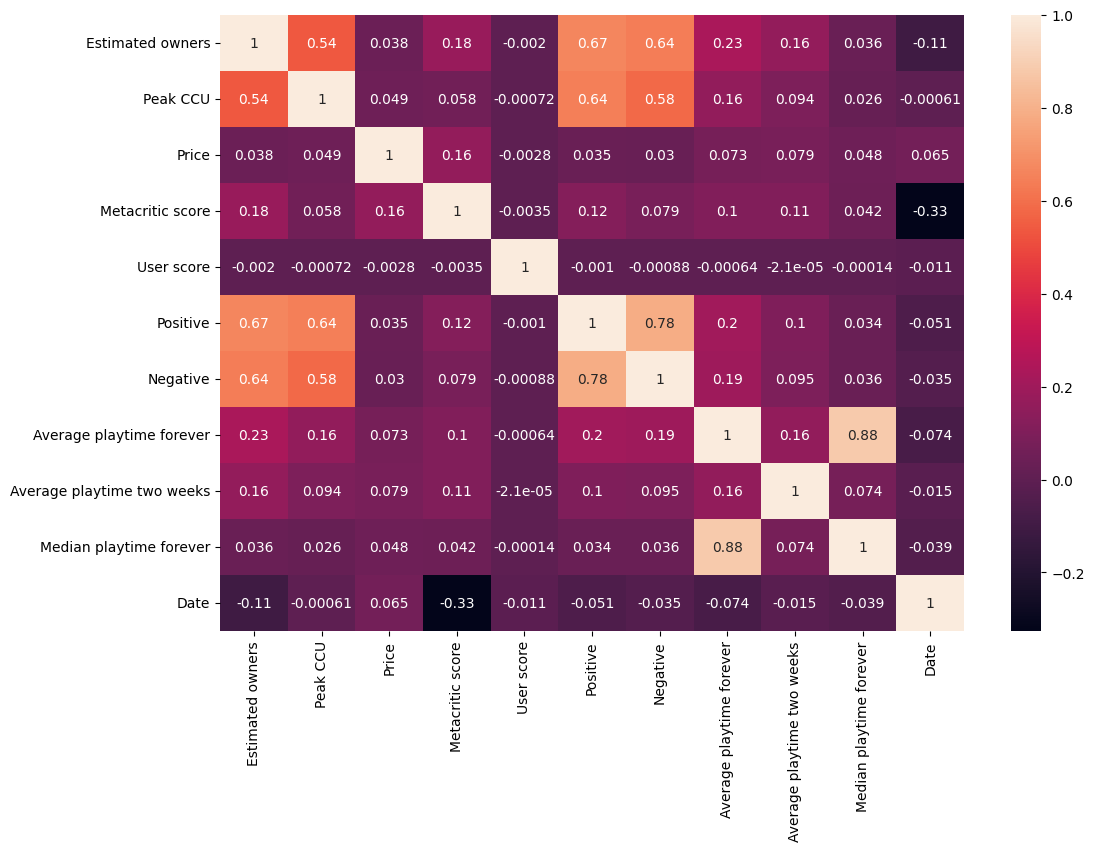

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(numeric_only=True), annot=True)